## Import statements

In [1]:
import numpy as np                                # For data management
import pandas as pd                               # For data management

import seaborn as sns                             # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt                   # For data visualization

from sklearn import datasets                      # To import the sample dataset
from sklearn.preprocessing import StandardScaler  # To transform the dataset
from sklearn.cluster import KMeans                # To instantiate, train and use model
from kmodes.kmodes import KModes
from sklearn import metrics                       # For Model Evaluation

# First networkx library is imported 
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
pip install networkx a

Note: you may need to restart the kernel to use updated packages.


## Data Load

In [3]:
raw_dataset = pd.read_csv('/Users/mariaussano/Desktop/City-characteristics.csv')
#raw_dataset.keys()

In [4]:
column =['USCensusID', 'City', 'CII.RES', 'US_census_region','Avg_population', 'Number of employees accommodation sector',
       'Number of employees administrative sector',
       'Number of employees education sector',
       'Number of employees finance sector',
       'Number of  employees health sector',
       'Number of employees information sector',
       'Number of employees manufacturing sector',
       'Number of employees otherservices',
       'Number of employees professional sector',
       'Number of employees realestate sector',
       'Number of employees retail sector',
       'Number of establishments accommodation sector',
       'Number of establishments administrative sector',
       'Number of establishments education sector',
       'Number of establishments finance sector',
       'Number of employees other services',
       'Number of establishments information sector',
       'Number of establishments manufacturing sector',
       'Number of establishments otherservices',
       'Number of establishments professional sector',
       'Number of establishments realestate sector',
       'Number of establishments retail sector', 'Family income 2010',
       'GDP per capita 2016', 'Total housing units',
       'Percent single-family houses', 'Percent medium density houses',
       'Percent high density houses',
       'Percent housing units built 1990 or later',
       'Percent housing units built between 1950-1989',
       'Percent housing units built before 1950',
       'Percent housing units built earlier to 1990', 'Median rooms',
       'Percent impervious area', 'Area open NLCD',
       'Area low development NLCD', 'Area medium development NLCD',
       'Area high development NLCD', 'Service area sq.meters']

In [5]:
dataframe=pd.DataFrame(raw_dataset.loc[:,column])

In [6]:
#print(dataframe['US_census_region'].value_counts())

In [7]:
#labels = dataframe['US_census_region'].astype('category').cat.categories.tolist()
#replace_map_comp = {'US_census_region' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

#print(replace_map_comp)

In [8]:
#dataframe.replace(replace_map_comp, inplace=True)

In [9]:
dataframe.head()

,USCensusID,City,CII.RES,US_census_region,Avg_population,Number of employees accommodation sector,Number of employees administrative sector,Number of employees education sector,Number of employees finance sector,Number of employees health sector,...,Percent housing units built between 1950-1989,Percent housing units built before 1950,Percent housing units built earlier to 1990,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
0,1600000US4801000,"Abilene city, Texas",0.727,South,123729,7500,1750,145,2599,17250,...,63.3,14.7,78.0,5.3,16.4,13874.8,10720.6,6208.8,3755.7,290335000
1,1600000US4500550,"Aiken city, South Carolina",NaN,South,29406,3030,7500,14,708,4505,...,49.6,7.1,56.7,6.0,9.0,7626.2,6274.4,1805.4,573.7,194774000
2,1600000US3501780,"Alamogordo city, New Mexico",0.205,West,32986,1750,245,10,294,2090,...,69.3,4.5,73.8,5.4,14.4,1792.0,3050.2,965.0,208.4,56002000
3,1600000US3502000,"Albuquerque city, New Mexico",0.380,West,614980,29238,19582,1268,11279,46890,...,57.6,7.2,64.8,5.3,26.9,11553.2,32002.9,24592.5,5344.4,489188000
4,1600000US4202184,"Altoona city, Pennsylvania",0.454,Northeast,54369,2176,1149,95,996,5724,...,37.1,58.7,95.8,6.1,18.9,4855.7,6346.8,3384.4,1673.1,131990000


## DATA EXPLOATION --> CORRELATION

In [10]:
corr=dataframe.corr() ##build correlation matrix
##streamline corr_matrix based on diagonality property
corr.values[np.tril_indices_from(corr.values)] = np.nan 
corr

,CII.RES,Avg_population,Number of employees accommodation sector,Number of employees administrative sector,Number of employees education sector,Number of employees finance sector,Number of employees health sector,Number of employees information sector,Number of employees manufacturing sector,Number of employees otherservices,...,Percent housing units built between 1950-1989,Percent housing units built before 1950,Percent housing units built earlier to 1990,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
CII.RES,NaN,0.268239,0.172117,0.200938,0.182046,0.203466,0.186534,0.228927,0.133270,0.180828,...,-0.177584,0.361250,0.275099,-0.346863,-0.080069,0.207692,0.174874,0.112384,0.225102,0.296485
Avg_population,NaN,NaN,0.962075,0.928050,0.925206,0.918837,0.937940,0.945734,0.728769,0.945802,...,-0.214145,0.276291,0.148377,-0.436618,0.353407,0.328245,0.446047,0.707489,0.918753,0.430330
Number of employees accommodation sector,NaN,NaN,NaN,0.936628,0.960257,0.950568,0.965590,0.979154,0.780396,0.980617,...,-0.181604,0.237322,0.129309,-0.413898,0.373044,0.311710,0.391983,0.680048,0.899815,0.297422
Number of employees administrative sector,NaN,NaN,NaN,NaN,0.893141,0.908146,0.911103,0.899937,0.749648,0.919807,...,-0.129248,0.184180,0.109655,-0.433311,0.329300,0.428007,0.528137,0.703334,0.914877,0.471957
Number of employees education sector,NaN,NaN,NaN,NaN,NaN,0.961814,0.978887,0.979920,0.648436,0.992481,...,-0.170645,0.245157,0.147067,-0.354524,0.360318,0.148002,0.201452,0.498089,0.808105,0.169348
Number of employees finance sector,NaN,NaN,NaN,NaN,NaN,NaN,0.974670,0.962338,0.665163,0.972669,...,-0.209403,0.282592,0.159420,-0.345396,0.400201,0.228108,0.285590,0.522883,0.827858,0.202671
Number of employees health sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967280,0.700533,0.987758,...,-0.196269,0.285231,0.172914,-0.349022,0.409475,0.224243,0.295035,0.561215,0.861199,0.219955
Number of employees information sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.720060,0.987044,...,-0.189926,0.276547,0.167942,-0.386003,0.359652,0.200681,0.262920,0.561397,0.832040,0.201090
Number of employees manufacturing sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711656,...,-0.103937,0.208717,0.158101,-0.329097,0.366377,0.499195,0.612991,0.822000,0.822463,0.350263
Number of employees otherservices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.166850,0.249864,0.155518,-0.370922,0.378182,0.213094,0.283544,0.571165,0.852644,0.219867


## FEATURE SELECTION (threshold criterion)

In [11]:
##dropping out features with correation index higher that 0.97
to_drop = [column for column in corr.columns if any(corr[column] > 0.95)]
print(to_drop)

['Number of employees accommodation sector', 'Number of employees education sector', 'Number of employees finance sector', 'Number of  employees health sector', 'Number of employees information sector', 'Number of employees otherservices', 'Number of employees professional sector', 'Number of employees realestate sector', 'Number of employees retail sector', 'Number of establishments accommodation sector', 'Number of establishments administrative sector', 'Number of establishments education sector', 'Number of establishments finance sector', 'Number of employees other services', 'Number of establishments manufacturing sector', 'Number of establishments otherservices', 'Number of establishments professional sector', 'Number of establishments realestate sector', 'Number of establishments retail sector', 'Total housing units']


In [12]:
#Now we are droping the columns which are in the 'to_drop' list from the dataframe
df = dataframe.drop(columns=to_drop)

In [13]:
df.head(2)

,USCensusID,City,CII.RES,US_census_region,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,...,Percent housing units built between 1950-1989,Percent housing units built before 1950,Percent housing units built earlier to 1990,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
0,1600000US4801000,"Abilene city, Texas",0.727,South,123729,1750,1991,52,51012.0,37553.0,...,63.3,14.7,78.0,5.3,16.4,13874.8,10720.6,6208.8,3755.7,290335000
1,1600000US4500550,"Aiken city, South Carolina",NaN,South,29406,7500,1506,17,75212.0,52750.0,...,49.6,7.1,56.7,6.0,9.0,7626.2,6274.4,1805.4,573.7,194774000


In [14]:
##df.corr()
df.corr().head()

,CII.RES,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent medium density houses,Percent high density houses,...,Percent housing units built between 1950-1989,Percent housing units built before 1950,Percent housing units built earlier to 1990,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
CII.RES,1.000000,0.268239,0.200938,0.133270,0.224621,-0.128588,0.027694,-0.281880,0.222418,0.316700,...,-0.177584,0.361250,0.275099,-0.346863,-0.080069,0.207692,0.174874,0.112384,0.225102,0.296485
Avg_population,0.268239,1.000000,0.928050,0.728769,0.903049,-0.041260,0.287310,-0.464544,0.244290,0.670532,...,-0.214145,0.276291,0.148377,-0.436618,0.353407,0.328245,0.446047,0.707489,0.918753,0.430330
Number of employees administrative sector,0.200938,0.928050,1.000000,0.749648,0.832625,-0.053381,0.260091,-0.431852,0.193441,0.686972,...,-0.129248,0.184180,0.109655,-0.433311,0.329300,0.428007,0.528137,0.703334,0.914877,0.471957
Number of employees manufacturing sector,0.133270,0.728769,0.749648,1.000000,0.806223,-0.113001,0.246936,-0.276775,0.148037,0.492377,...,-0.103937,0.208717,0.158101,-0.329097,0.366377,0.499195,0.612991,0.822000,0.822463,0.350263
Number of establishments information sector,0.224621,0.903049,0.832625,0.806223,1.000000,-0.011694,0.277499,-0.388509,0.179320,0.584532,...,-0.136404,0.230157,0.157005,-0.390789,0.327347,0.231081,0.310096,0.640577,0.800204,0.231515


<AxesSubplot:>

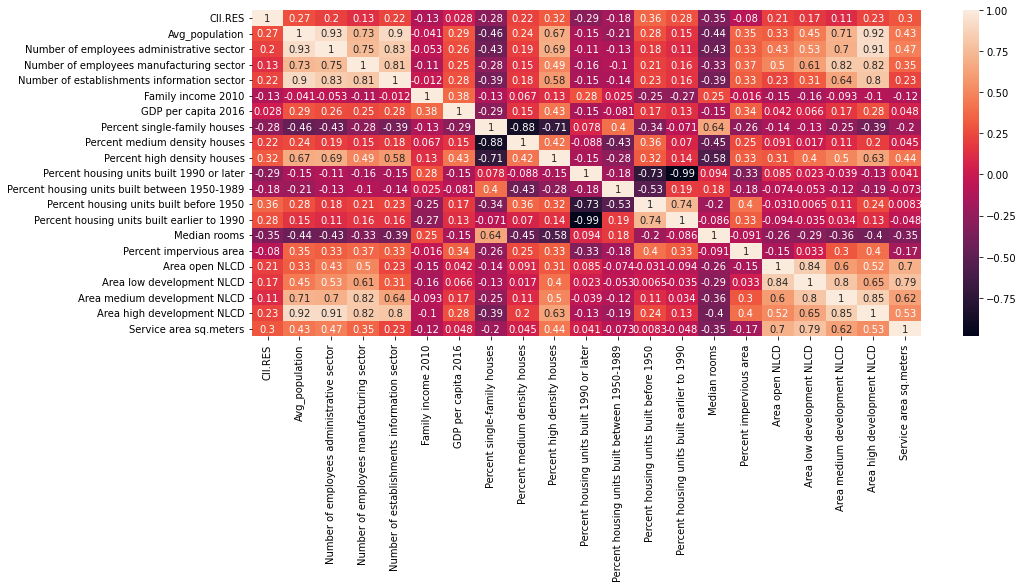

In [15]:
plt.figure(figsize = (15,6))
sns.heatmap(df.corr(), annot=True)

In [16]:
#drop_out highly inverse correlated features
to_drop1 = [column for column in corr.columns if any(corr[column] < -0.87)]
print(to_drop1)

['Percent medium density houses', 'Percent housing units built earlier to 1990']


In [17]:
#Now we are droping the columns belonging to 'to_drop1' from the dataframe
dataf= df.drop(columns=to_drop1)

In [18]:
dataf.head()

,USCensusID,City,CII.RES,US_census_region,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,...,Percent housing units built 1990 or later,Percent housing units built between 1950-1989,Percent housing units built before 1950,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
0,1600000US4801000,"Abilene city, Texas",0.727,South,123729,1750,1991,52,51012.0,37553.0,...,21.9,63.3,14.7,5.3,16.4,13874.8,10720.6,6208.8,3755.7,290335000
1,1600000US4500550,"Aiken city, South Carolina",NaN,South,29406,7500,1506,17,75212.0,52750.0,...,44.8,49.6,7.1,6.0,9.0,7626.2,6274.4,1805.4,573.7,194774000
2,1600000US3501780,"Alamogordo city, New Mexico",0.205,West,32986,245,118,10,49297.0,57892.0,...,31.2,69.3,4.5,5.4,14.4,1792.0,3050.2,965.0,208.4,56002000
3,1600000US3502000,"Albuquerque city, New Mexico",0.380,West,614980,19582,10810,276,59191.0,42723.0,...,34.1,57.6,7.2,5.3,26.9,11553.2,32002.9,24592.5,5344.4,489188000
4,1600000US4202184,"Altoona city, Pennsylvania",0.454,Northeast,54369,1149,1006,23,48750.0,37482.0,...,5.4,37.1,58.7,6.1,18.9,4855.7,6346.8,3384.4,1673.1,131990000


<AxesSubplot:>

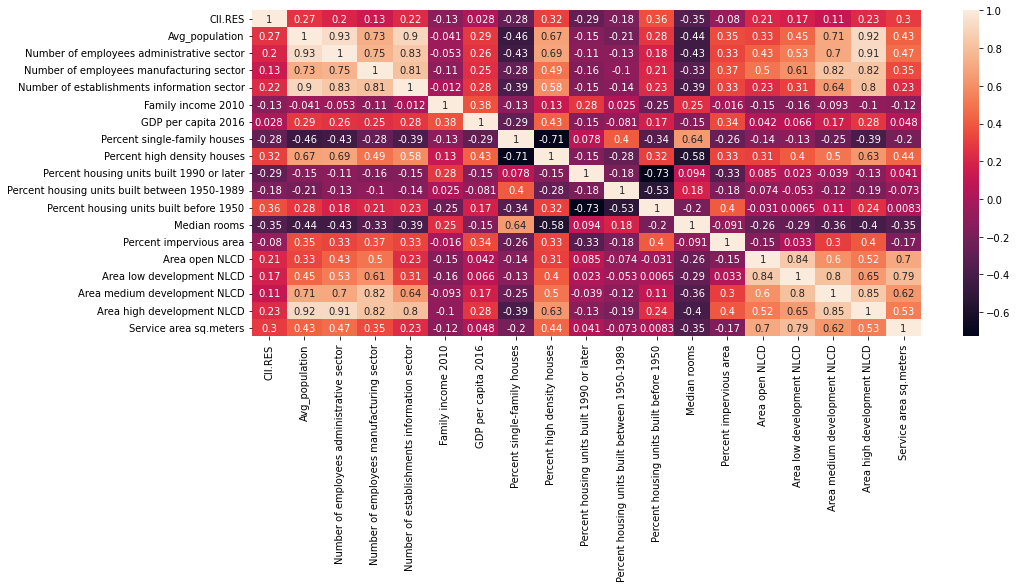

In [19]:
plt.figure(figsize = (15,6))
sns.heatmap(dataf.corr(), annot=True)

In [20]:
dataframe=dataf

In [21]:
##sns.pairplot(dataframe)
##plt.show()

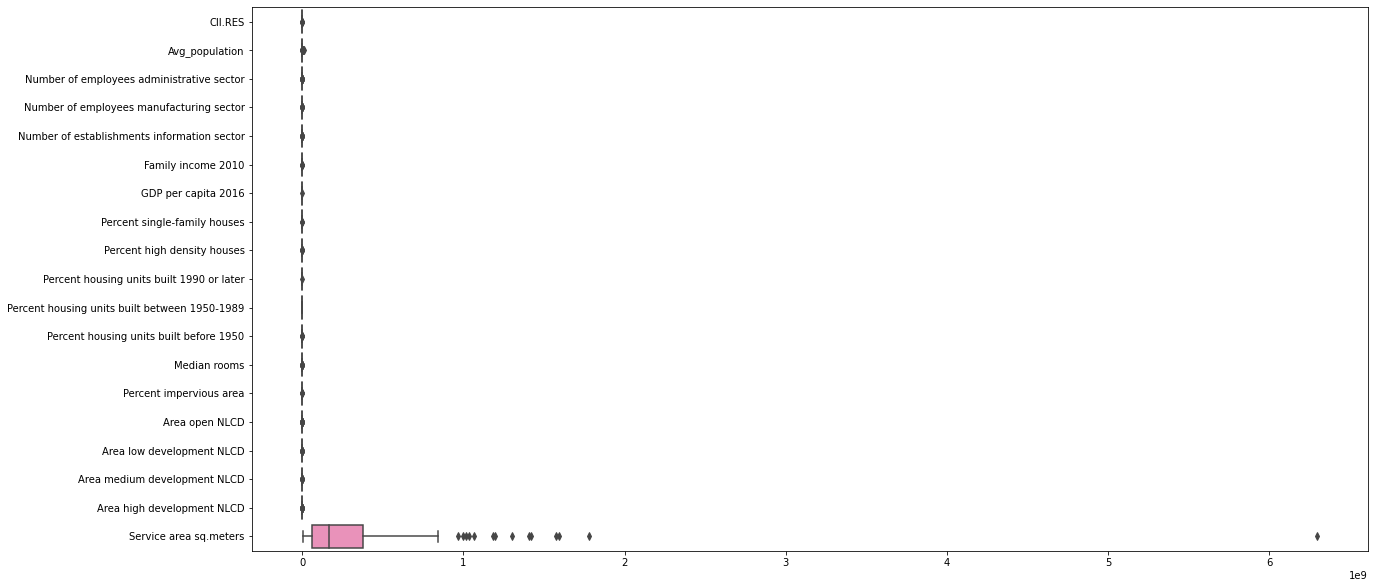

In [22]:
plt.figure(figsize = (20,10))
sns.boxplot(data = dataframe, orient = "h")
plt.show()

## STANDARDIZATION
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) may assume that all features are centered around zero or have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
The preprocessing module provides the StandardScaler utility class, which is a quick and easy way to perform the following operation on an array-like dataset.
https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

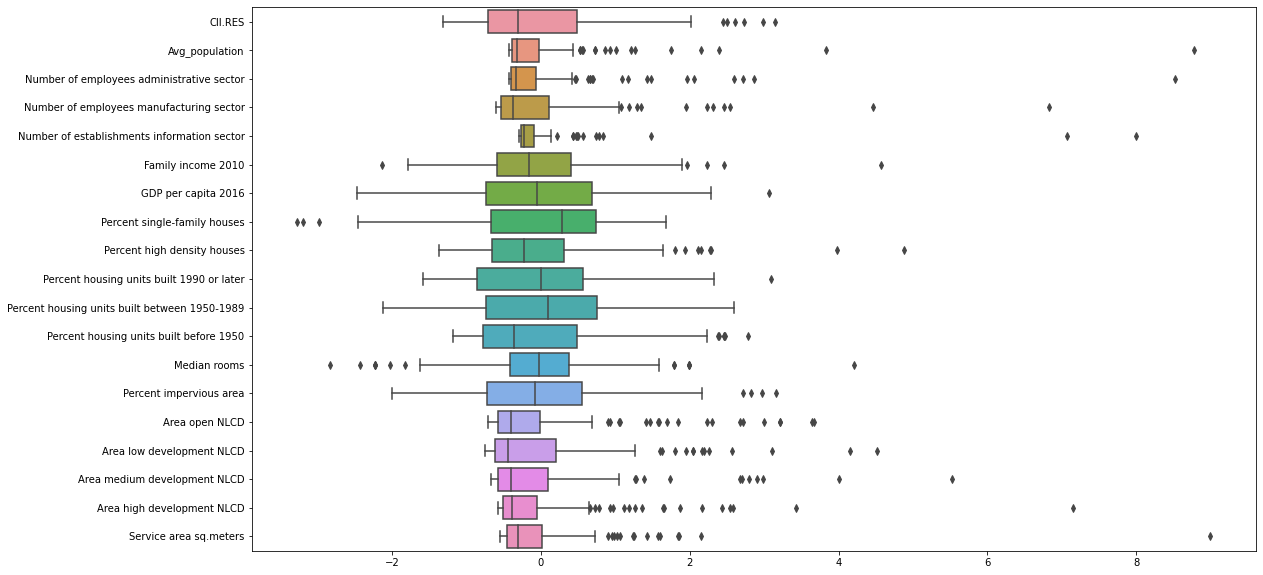

In [23]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(dataframe.drop(index=0,columns=['USCensusID','City','US_census_region']))
scaled_dataframe = pd.DataFrame(scaled_array, columns=(dataframe.drop(index=0,columns=['USCensusID','City','US_census_region'])).columns)
plt.figure(figsize = (18,10))
sns.boxplot(data = scaled_dataframe, orient = "h")
plt.show()

In [24]:
scaled_dataframe.describe()

,CII.RES,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,Percent housing units built 1990 or later,Percent housing units built between 1950-1989,Percent housing units built before 1950,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
count,1.020000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.220000e+02,1.220000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.240000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02
mean,1.436759e-16,-4.884981e-18,-3.941292e-17,-3.119727e-17,-6.883383e-18,1.064722e-16,-3.640075e-17,-5.228792e-16,1.772775e-16,2.853900e-16,-4.297638e-16,-1.566847e-17,-1.991463e-15,-1.847411e-16,-1.065814e-16,-8.881784e-18,-1.089129e-16,9.592327e-17,-8.881784e-19
std,1.004938e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004124e+00,1.004124e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004057e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00,1.004024e+00
min,-1.320630e+00,-4.288859e-01,-4.316499e-01,-6.001157e-01,-2.913808e-01,-2.132194e+00,-2.463376e+00,-3.272671e+00,-1.368524e+00,-1.588470e+00,-2.121621e+00,-1.175662e+00,-2.835161e+00,-2.001788e+00,-7.051632e-01,-7.509936e-01,-6.731853e-01,-5.711533e-01,-5.444428e-01
25%,-7.137860e-01,-3.898717e-01,-4.036177e-01,-5.363598e-01,-2.687208e-01,-5.914336e-01,-7.323966e-01,-6.718375e-01,-6.525169e-01,-8.631204e-01,-7.379679e-01,-7.745763e-01,-4.203244e-01,-7.205963e-01,-5.811116e-01,-6.195019e-01,-5.777816e-01,-5.147916e-01,-4.599998e-01
50%,-3.126997e-01,-3.139609e-01,-3.367378e-01,-3.680090e-01,-2.313985e-01,-1.618429e-01,-4.960609e-02,2.886785e-01,-2.242203e-01,6.945498e-03,9.860652e-02,-3.609568e-01,-1.785162e-02,-7.178767e-02,-4.042843e-01,-4.451146e-01,-3.983012e-01,-3.874783e-01,-3.078593e-01
75%,4.913693e-01,-2.666351e-02,-6.250173e-02,1.034761e-01,-9.410560e-02,4.059076e-01,6.913618e-01,7.401886e-01,3.152373e-01,5.646348e-01,7.528214e-01,4.850831e-01,3.846212e-01,5.523826e-01,-1.045767e-02,2.080776e-01,9.015690e-02,-4.609063e-02,2.019684e-02
max,3.151055e+00,8.776542e+00,8.514147e+00,6.825609e+00,7.991511e+00,4.571382e+00,3.062957e+00,1.685485e+00,4.882645e+00,3.098945e+00,2.601491e+00,2.778791e+00,4.208113e+00,3.160840e+00,3.676904e+00,4.512987e+00,5.520554e+00,7.152466e+00,8.994849e+00


In [25]:
#scaled_dataframe['USCensusID']=dataframe['USCensusID']
#scaled_dataframe['City']=dataframe['City']
##scaled_dataframe['US_census_region']=dataframe['US_census_region']

## OPTIMAL k_cluster CHOICE

In [26]:
#change inf to NaN
pd.set_option('use_inf_as_na',True)
#remove NaN
scaled_dataframe.dropna(inplace=True)

In [27]:
print(scaled_dataframe)

      CII.RES  Avg_population  Number of employees administrative sector  \
1   -1.174609       -0.395482                                  -0.424240   
2   -0.842740        0.248114                                   0.185499   
3   -0.702408       -0.371835                                  -0.395735   
4   -0.325026       -0.214408                                  -0.195473   
5   -0.819984       -0.389872                                  -0.412604   
..        ...             ...                                        ...   
120 -0.425535       -0.421171                                  -0.427141   
121  0.431633       -0.402421                                  -0.403618   
122  0.336814       -0.277141                                  -0.376784   
123 -0.095563        0.069675                                  -0.059853   
124  0.516971       -0.185424                                  -0.109579   

     Number of employees manufacturing sector  \
1                                   -0

#  1- Elbow method

In [28]:
inertia = []
K = range(1,80)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_dataframe)
    inertia.append(km.inertia_)

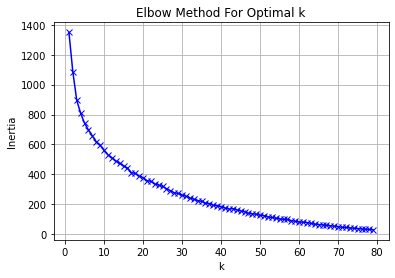

In [29]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

(0.0, 10.0, 200.0, 1500.0)

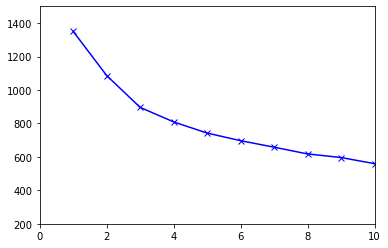

In [30]:
plt.plot(K, inertia, 'bx-')
plt.axis([0,10,200,1500])

## K=5 PARTITION CLUSTERING

In [31]:
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(scaled_dataframe)
centroids = kmeans_model.cluster_centers_
centroids

kmeans_model.cluster_centers_.shape
kmeans_model.labels_ 
scaled_dataframe["cluster"] = kmeans_model.labels_
scaled_dataframe1=scaled_dataframe
scaled_dataframe1

,CII.RES,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,Percent housing units built 1990 or later,Percent housing units built between 1950-1989,Percent housing units built before 1950,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters,cluster
1,-1.174609,-0.395482,-0.424240,-0.591889,-0.279384,-0.716944,0.601864,0.853489,-1.276980,0.275201,1.507334,-0.918716,0.384621,-0.868426,-0.598306,-0.609125,-0.625235,-0.551369,-0.468610,0
2,-0.842740,0.248114,0.185499,0.193454,0.075178,0.081510,-0.657490,0.413816,-0.126137,0.479923,0.440531,-0.749508,0.183385,0.158170,0.014680,0.929261,0.708897,-0.046091,0.188275,0
3,-0.702408,-0.371835,-0.395735,-0.526664,-0.262056,-0.761087,-1.092607,1.076707,-0.714636,-1.546113,-1.428655,2.477977,1.793276,-0.498852,-0.405911,-0.433962,-0.488623,-0.407272,-0.353382,0
4,-0.325026,-0.214408,-0.195473,0.300179,-0.203407,-0.251300,-0.403029,1.036122,-0.479237,-0.289548,0.869076,-0.266952,-0.219088,0.018553,-0.262103,0.282205,-0.254241,-0.107775,-0.149325,0
5,-0.819984,-0.389872,-0.412604,-0.576758,-0.207406,2.458553,0.691362,-1.304290,0.253118,-0.254251,0.239935,0.046396,0.183385,0.609872,-0.661826,-0.687641,-0.616189,-0.533139,-0.521700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,-0.425535,-0.421171,-0.427141,-0.582340,-0.283383,-0.087881,-0.210170,-0.431709,-0.910803,0.522279,0.367587,-0.799644,-0.219088,0.503106,-0.686236,-0.713683,-0.647494,-0.554655,-0.535355,1
121,0.431633,-0.402421,-0.403618,-0.540473,-0.262056,-0.925071,-0.351224,-0.966080,0.030796,-1.454342,-1.720430,2.459176,0.183385,0.609872,-0.654504,-0.697461,-0.594467,-0.523656,-0.516663,2
122,0.336814,-0.277141,-0.376784,-0.376897,-0.231398,-0.594117,-0.797880,0.873782,-0.766947,-0.529566,0.859958,-0.135346,-0.017852,-1.722554,0.691796,0.032017,-0.170684,-0.181314,1.837915,0
123,-0.095563,0.069675,-0.059853,1.294565,-0.051452,-0.017590,-0.337027,0.819668,-0.440003,-0.148360,0.249053,-0.022541,0.787094,-0.991618,0.603276,1.809257,0.345730,0.254833,1.256677,3


## 2- Silhouette Test Method

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

**Silhouette score**

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
- 1 Means clusters are well apart from each other and clearly distinguished.
- 0 Means clusters are indifferent, or we can say that the distance between clusters is not significant.
- 1 Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)
where
a= average intra-cluster distance i.e the average distance between each point within a cluster.
b= average inter-cluster distance i.e the average distance between all clusters.

In [32]:
from sklearn.metrics import silhouette_score
%matplotlib inline

In [33]:
scaled_dataframe=scaled_dataframe.drop(columns="cluster")
label=kmeans_model.predict(scaled_dataframe)

## Selecting the number of clusters with silhouette analysis on KMeans clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.



In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2,3,4,10]
silhouette_avg_n_clusters = []

For n_clusters = 2 The average silhouette_score is : 0.26576475087352536
For n_clusters = 3 The average silhouette_score is : 0.24135614255239837
For n_clusters = 4 The average silhouette_score is : 0.1535501142276947
For n_clusters = 10 The average silhouette_score is : 0.14775990122974764


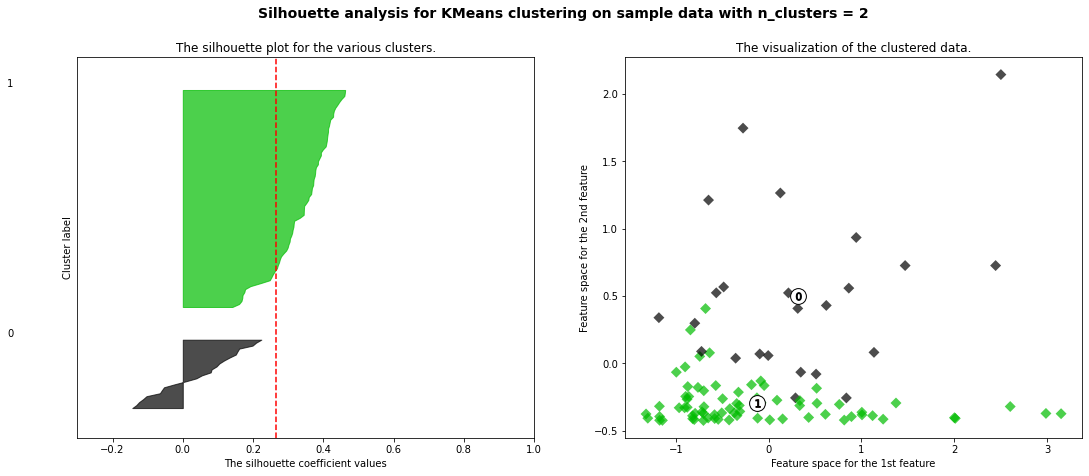

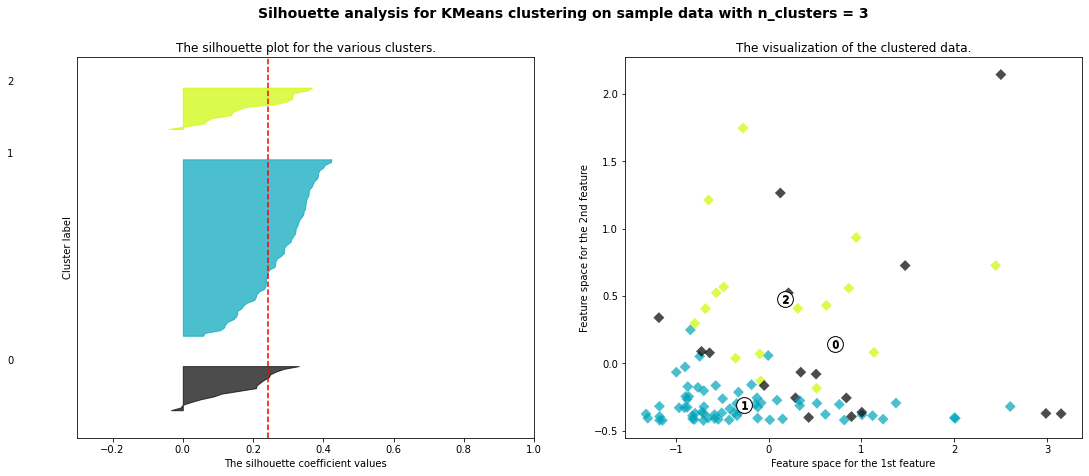

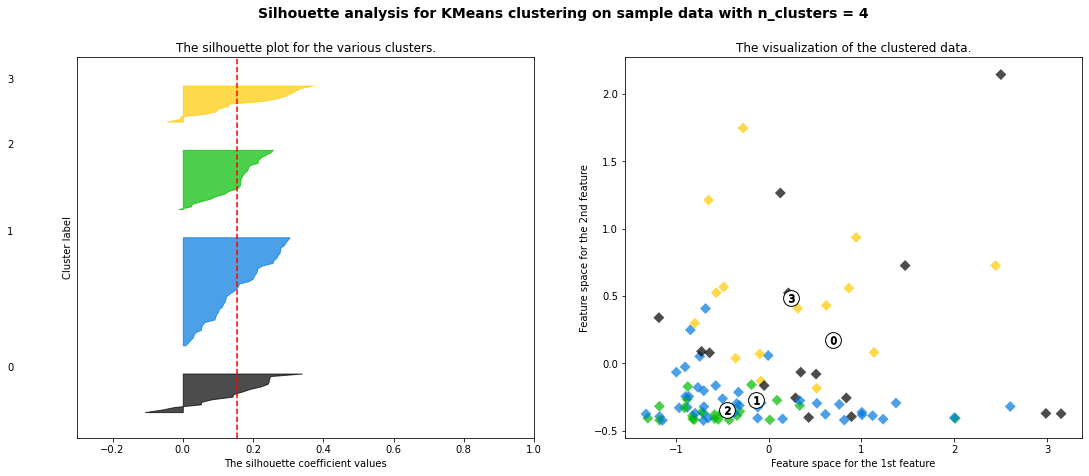

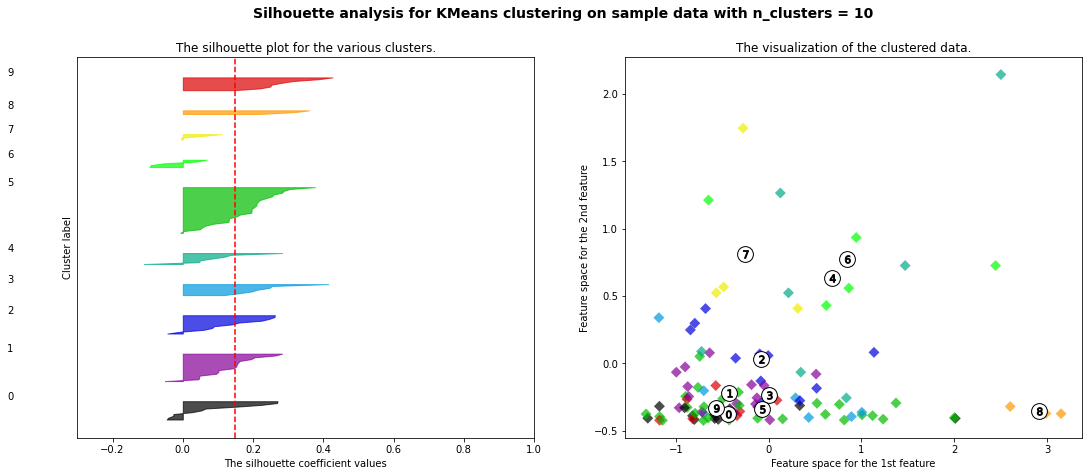

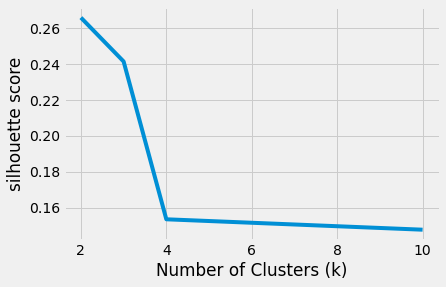

In [35]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_dataframe) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_dataframe)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_dataframe, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_dataframe, cluster_labels)

    sample_silhouette_values
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.5, y_lower + 1 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_dataframe.iloc[:, 0], scaled_dataframe.iloc[:, 1], marker='D', s=60, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=250, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=60, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

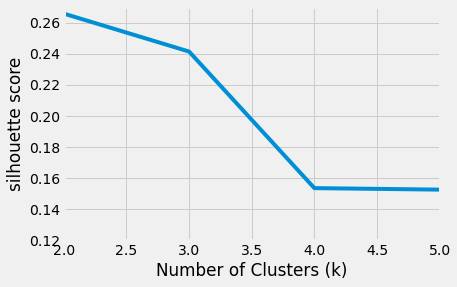

In [36]:
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.axis([2,5,0.12,0.27])
plt.show()

## PIE CHART

In [37]:
# For illustration, you can see which sentence is in which cluster
print(kmeans_model.labels_)  

[0 0 0 0 1 1 0 1 3 2 1 1 1 1 2 1 1 1 3 0 3 1 3 0 2 1 0 0 1 1 0 3 0 0 2 0 1
 3 0 0 3 0 2 0 0 0 0 3 2 3 1 2 1 3 2 1 0 1 0 3 1 2 3 1 1 0 0 0 0 2 0 1 2 1
 0 0 2 0 2 1 0 1 0 1 1 0 0 1 2 3 1 1 1 1 2 0 3 3]


In [38]:
# Here we get the proportions
nb_samples = [sum(kmeans_model.labels_ == j) for j in range(0,4)]

In [39]:
# On the next line the order is RANDOM. I do NOT know which cluster represents what.
# The first label should represent samples in cluster 0, and so on
labels = '1','2','3','4'
colors = ['gold','red','lightblue','green']  # Same size as labels

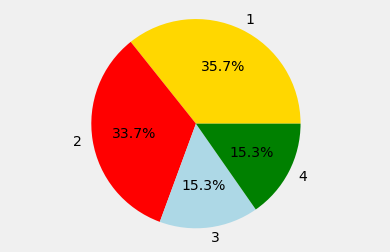

In [40]:
# Pie chart
plt.pie(nb_samples, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
np.random.seed(42)

## CLUSTERS

In [41]:
#scaled_dataframe['USCensusID']=dataframe['USCensusID']
#scaled_dataframe['City']=dataframe['City']
##scaled_dataframe['US_census_region']=dataframe['US_census_region']

In [42]:
print(scaled_dataframe1)

      CII.RES  Avg_population  Number of employees administrative sector  \
1   -1.174609       -0.395482                                  -0.424240   
2   -0.842740        0.248114                                   0.185499   
3   -0.702408       -0.371835                                  -0.395735   
4   -0.325026       -0.214408                                  -0.195473   
5   -0.819984       -0.389872                                  -0.412604   
..        ...             ...                                        ...   
120 -0.425535       -0.421171                                  -0.427141   
121  0.431633       -0.402421                                  -0.403618   
122  0.336814       -0.277141                                  -0.376784   
123 -0.095563        0.069675                                  -0.059853   
124  0.516971       -0.185424                                  -0.109579   

     Number of employees manufacturing sector  \
1                                   -0

In [43]:
cluster1_range=np.where(scaled_dataframe1["cluster"]==0)
cluster1_range


(array([ 0,  1,  2,  3,  6, 19, 23, 26, 27, 30, 32, 33, 35, 38, 39, 41, 43,
        44, 45, 46, 56, 58, 65, 66, 67, 68, 70, 74, 75, 77, 80, 82, 85, 86,
        95]),)

In [44]:
##getting cluster1_samples_groupes
cluster1 =scaled_dataframe.groupby(scaled_dataframe1['cluster'])
cluster01=cluster1.get_group(int('0'))

In [45]:
cluster01

,CII.RES,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,Percent housing units built 1990 or later,Percent housing units built between 1950-1989,Percent housing units built before 1950,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
1,-1.174609,-0.395482,-0.424240,-0.591889,-0.279384,-0.716944,0.601864,0.853489,-1.276980,0.275201,1.507334,-0.918716,0.384621,-0.868426,-0.598306,-0.609125,-0.625235,-0.551369,-0.468610
2,-0.842740,0.248114,0.185499,0.193454,0.075178,0.081510,-0.657490,0.413816,-0.126137,0.479923,0.440531,-0.749508,0.183385,0.158170,0.014680,0.929261,0.708897,-0.046091,0.188275
3,-0.702408,-0.371835,-0.395735,-0.526664,-0.262056,-0.761087,-1.092607,1.076707,-0.714636,-1.546113,-1.428655,2.477977,1.793276,-0.498852,-0.405911,-0.433962,-0.488623,-0.407272,-0.353382
4,-0.325026,-0.214408,-0.195473,0.300179,-0.203407,-0.251300,-0.403029,1.036122,-0.479237,-0.289548,0.869076,-0.266952,-0.219088,0.018553,-0.262103,0.282205,-0.254241,-0.107775,-0.149325
7,-0.080392,-0.293728,-0.279191,-0.263047,-0.178081,-0.382681,-1.138850,-0.120555,-0.060748,0.183429,-0.772160,0.441214,-0.420324,-1.246213,1.573873,-0.116058,-0.363581,-0.371501,0.163106
26,0.814704,-0.421740,-0.428780,-0.545468,-0.280717,-0.951622,-0.481983,1.157878,-0.976191,-0.861356,0.367587,0.503884,0.787094,-0.260681,-0.654736,-0.696802,-0.651576,-0.548890,-0.523500
30,2.602999,-0.321173,-0.362121,0.174210,-0.266055,-0.994716,-0.836319,-0.769918,-0.453081,0.444626,0.376705,-0.768309,-0.822797,0.585234,-0.512655,-0.597297,-0.557324,-0.415802,-0.473776
36,-0.679651,0.406807,0.472790,0.251995,-0.052784,-1.293228,-1.713027,0.731733,-0.570781,0.585813,0.157873,-0.649237,0.183385,0.092468,0.163952,0.983617,1.054001,0.641682,0.460632
38,1.006239,-0.383148,-0.409609,-0.562435,-0.252726,0.221769,-0.331132,0.352938,-1.120047,0.345795,1.352328,-1.018988,0.384621,-0.392086,-0.585350,-0.601436,-0.461762,-0.493689,-0.416272
41,1.372242,-0.295076,-0.195473,0.371060,-0.219402,-1.049915,-1.576457,0.589685,-0.583859,-0.296607,0.759660,-0.204283,-0.017852,-0.605618,-0.163572,-0.178475,-0.380114,-0.326935,-0.202845


In [46]:
cluster2_range=np.where(scaled_dataframe1["cluster"]==1)
cluster2_range

(array([ 4,  5,  7, 10, 11, 12, 13, 15, 16, 17, 21, 25, 28, 29, 36, 50, 52,
        55, 57, 60, 63, 64, 71, 73, 79, 81, 83, 84, 87, 90, 91, 92, 93]),)

In [47]:
##getting cluster2_samples_groupes
cluster2 =scaled_dataframe.groupby(scaled_dataframe1['cluster'])
cluster2.get_group(int('1'))

,CII.RES,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,Percent housing units built 1990 or later,Percent housing units built between 1950-1989,Percent housing units built before 1950,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
5,-0.819984,-0.389872,-0.412604,-0.576758,-0.207406,2.458553,0.691362,-1.304290,0.253118,-0.254251,0.239935,0.046396,0.183385,0.609872,-0.661826,-0.687641,-0.616189,-0.533139,-0.521700
6,-0.899632,-0.026664,-0.088894,0.110381,-0.136760,0.232986,1.080733,0.251475,-0.191526,0.310498,1.142615,-1.094191,-0.017852,0.806978,0.079526,0.208078,0.090157,0.116708,-0.162727
10,-0.994452,-0.066129,-0.166054,-0.424273,-0.176748,-0.007018,1.021539,-0.370831,0.383896,0.190489,1.324975,-1.075390,0.384621,-0.507064,-0.062517,0.077303,0.055036,-0.126005,0.052110
14,-1.174609,-0.423273,-0.428654,-0.578301,-0.291381,-0.503409,-0.666457,-0.479058,-0.950036,1.828260,-1.301003,-0.887382,0.384621,0.043191,-0.693696,-0.741477,-0.646037,-0.567641,-0.538579
15,-0.505183,-0.368314,-0.358022,-0.421041,-0.198075,0.479930,-0.335283,0.826432,-0.662325,2.322415,-1.756902,-0.856047,0.183385,-0.170341,-0.473281,-0.445115,-0.578103,-0.538019,-0.449876
17,-0.141076,-0.302769,-0.284741,-0.513737,-0.231398,-0.219100,0.688290,-1.439574,0.410051,0.748178,-0.279790,-0.517631,-1.225270,-0.917703,-0.344620,-0.518653,-0.526556,-0.483084,-0.350369
18,-0.417949,-0.337374,-0.034343,-0.233372,-0.168750,1.486512,0.688290,0.089135,1.940149,-1.073136,2.601491,-0.793377,1.592040,0.544170,-0.421780,-0.427607,-0.424066,-0.324781,-0.402689
20,2.011325,-0.409075,-0.428938,-0.589686,-0.288715,1.687296,0.601864,0.420580,-1.106969,0.042242,0.477003,-0.436160,0.183385,-1.911448,-0.614357,-0.661175,-0.598493,-0.555226,0.264543
21,-1.301667,-0.407959,-0.413361,-0.599161,-0.275386,4.571382,0.691362,0.982009,-0.740792,0.790534,0.741424,-1.106725,4.208113,-0.203192,-0.660658,-0.698816,-0.673185,-0.566884,-0.536367
22,-0.340197,-0.388761,-0.410618,-0.532100,-0.224734,0.121215,-0.666457,-1.087836,-0.518470,1.637657,-1.592778,-0.461228,-0.621561,-0.646681,-0.455590,-0.576521,-0.572406,-0.539564,-0.443863


In [48]:
cluster3_range=np.where(scaled_dataframe1["cluster"]==2)
cluster3_range

(array([ 9, 14, 24, 34, 42, 48, 51, 54, 61, 69, 72, 76, 78, 88, 94]),)

In [49]:
##getting cluster3_samples_groupes
cluster3 =scaled_dataframe.groupby(scaled_dataframe1['cluster'])
cluster3.get_group(int('2'))

,CII.RES,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,Percent housing units built 1990 or later,Percent housing units built between 1950-1989,Percent housing units built before 1950,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
12,0.892456,-0.395903,-0.385329,-0.543632,-0.238063,-0.098937,-1.353460,-0.939023,-0.243837,-0.910771,-1.036582,1.450195,-0.420324,-0.268894,-0.534314,-0.620193,-0.510170,-0.385609,-0.417663
19,1.470854,0.726372,0.658736,-0.088967,0.468395,0.033816,2.174211,-2.981811,1.796294,-1.037840,-2.121621,2.377706,-1.828979,2.827319,-0.604774,-0.565730,-0.013683,0.469675,-0.356516
32,-0.636034,0.078015,-0.189041,-0.151694,-0.122097,-0.293829,2.028508,0.576157,0.645451,-0.790762,-0.580683,1.105512,-0.219088,-0.096426,-0.010458,0.131282,-0.311249,-0.227985,-0.197183
45,2.987966,-0.372396,-0.393780,-0.452552,-0.260723,0.579596,-0.206683,-1.243412,2.280171,0.112836,-0.170374,-0.185482,-0.621561,0.207446,-0.541467,-0.533902,-0.520712,-0.439334,-0.446247
58,3.151055,-0.374455,-0.359630,-0.257832,-0.244728,-0.185609,-0.336861,-0.431709,0.671606,-0.748406,-0.644509,0.998974,-0.017852,0.544170,-0.626841,-0.621574,-0.468979,-0.424882,-0.460000
64,-0.723268,0.088517,-0.053956,-0.010961,-0.114100,-0.036151,1.279902,-1.081071,0.880850,-1.397867,0.467885,0.898703,-2.030216,2.966936,-0.580509,-0.526426,0.273963,0.310634,-0.345099
69,0.837460,-0.257107,0.197387,-0.220445,-0.110101,0.481222,0.830008,-1.317818,0.789306,-0.988424,-0.717452,1.268453,-0.621561,0.552383,-0.400171,-0.394286,-0.125811,-0.193139,-0.307859
73,0.213548,0.523270,0.464087,1.072595,-0.015462,-1.343666,0.584347,-1.121657,0.566984,-1.433164,-0.781278,1.838747,-0.621561,1.981404,-0.311575,0.274708,0.554770,0.403131,-0.173280
82,0.126314,1.265555,0.389545,1.056362,0.427074,-1.013761,1.010746,-3.272671,0.200807,-1.433164,-1.401301,2.227298,0.787094,2.162085,-0.009635,-0.098248,0.959654,1.868478,0.005870
90,0.289404,-0.256707,-0.304733,-0.422437,-0.094106,0.408187,0.092859,-1.331347,0.488518,-1.108433,-1.784256,2.202231,-0.621561,-0.769873,0.312796,0.004509,-0.280825,-0.173886,0.010900


In [50]:
cluster4_range=np.where(scaled_dataframe1["cluster"]==3)
cluster4_range

(array([ 8, 18, 20, 22, 31, 37, 40, 47, 49, 53, 59, 62, 89, 96, 97]),)

In [51]:
##getting cluster3_samples_groupes
cluster4 =scaled_dataframe.groupby(scaled_dataframe1['cluster'])
cluster4.get_group(int('3'))

,CII.RES,Avg_population,Number of employees administrative sector,Number of employees manufacturing sector,Number of establishments information sector,Family income 2010,GDP per capita 2016,Percent single-family houses,Percent high density houses,Percent housing units built 1990 or later,Percent housing units built between 1950-1989,Percent housing units built before 1950,Median rooms,Percent impervious area,Area open NLCD,Area low development NLCD,Area medium development NLCD,Area high development NLCD,Service area sq.meters
11,-0.484323,0.567362,1.177946,0.932082,0.840286,0.469359,0.885466,-0.641399,1.417038,1.016434,-0.170374,-0.849780,-1.426506,-0.786298,2.677502,1.164598,1.284255,1.188044,1.597914
25,-0.563971,0.523811,1.474854,0.953089,0.493721,0.410851,0.545161,-0.012328,0.292351,1.531767,-0.735688,-0.830979,0.384621,0.059617,3.645857,2.163722,0.680388,0.733235,0.656876
27,2.445598,0.726372,-0.069817,0.345572,-0.060782,-1.002624,0.257906,-1.196063,0.580062,-1.404926,-1.054818,1.920217,-1.225270,-0.351022,3.208718,2.196166,0.991003,0.786812,1.060227
29,0.943658,0.934984,2.861043,2.544930,0.737649,-1.050641,1.080733,-0.844325,1.560894,-0.218954,0.960255,-0.498830,-1.426506,0.404553,2.230680,2.038097,1.380557,2.586090,0.958706
42,0.314057,0.407837,0.695565,2.318920,0.060515,-0.129119,1.080733,0.745262,-0.113059,1.094087,-0.854222,-0.454961,-0.017852,-0.121064,3.676904,4.149107,2.680251,2.535670,2.148794
48,-0.084185,-0.130957,0.424356,0.637468,-0.059449,-0.271798,-0.356122,-0.147612,-0.413848,0.649347,0.212581,-0.630436,-0.017852,-0.622043,1.463310,0.763008,0.155431,0.171122,0.444772
54,1.135193,0.081288,0.060379,0.650690,0.072512,-0.189322,0.249853,0.447637,0.200807,-0.381319,-0.334497,0.566554,0.585858,-0.285320,1.590119,1.631007,0.623262,0.658673,0.699051
63,-0.275720,1.747564,0.047104,-0.407306,0.071179,0.336848,-0.604523,0.319117,-0.217681,2.322415,-1.255413,-1.094191,-0.017852,0.544170,0.421908,1.162431,2.909929,2.160223,1.016964
66,0.864010,0.558624,0.187896,1.944391,0.100504,-0.194325,-0.021462,0.528807,-0.479237,-0.176598,-0.334497,0.359744,0.183385,-0.901277,2.721354,1.945521,0.929541,1.119041,1.862284
71,0.621272,0.430033,1.092872,0.783784,0.115166,-1.259172,-0.388002,0.285296,-0.453081,-0.720168,1.005845,-0.104011,-0.017852,0.207446,2.301441,1.605338,1.264634,1.261790,0.728110


In [52]:
from pickle import dump,load

In [53]:
out_file = open("cluster1.tmp", "wb")

In [54]:
dump(cluster1,out_file)

## GRAPH REPRESENTATION 

In [579]:
#questa funzione crea un grafo n_nodi=n_samples
#ogni nodo è labelled con la uwd di quel sample
#per ogni nodo crea un link con tutti gli altri e con se stesso
#ogni link ha come attributo(/valore?) la correlazione tra le uwd.
def create_graph(path_cluster):
    m =[tuple(x) for x in path_cluster.to_numpy()]# =list(path_cluster.itertuples(index=False, name=None))
    G = nx.Graph()
    #print(m[0][0])
    for i in range (len(m)):
        G.add_node(m[i][0], population= m[i][1], income= m[i][5])
        for j in range (len(m)-1):
            corr=np.corrcoef(m[i],m[j])
            #print(corr[0][1])
            if(corr[0][1] > 0.5 ):
                G.add_edge(m[i][0],m[j][0],corr=np.corrcoef(m[i],m[j]))
    return G

In [580]:
# Driver code
def visualize(graph):
    plt.figure(figsize = (40,25))
    nx.draw_networkx(graph,pos=nx.random_layout(graph))
    #nodes = nx.draw_networkx_nodes(graph, pos=nx.random_layout(graph))
    #edge_labels = nx.draw_networkx_edge_labels(graph,pos=nx.random_layout(graph))
    plt.show()


In [581]:
g = create_graph(cluster01)
#print('Number of nodes:', len(g.nodes()))

In [582]:
len(g.nodes())

34

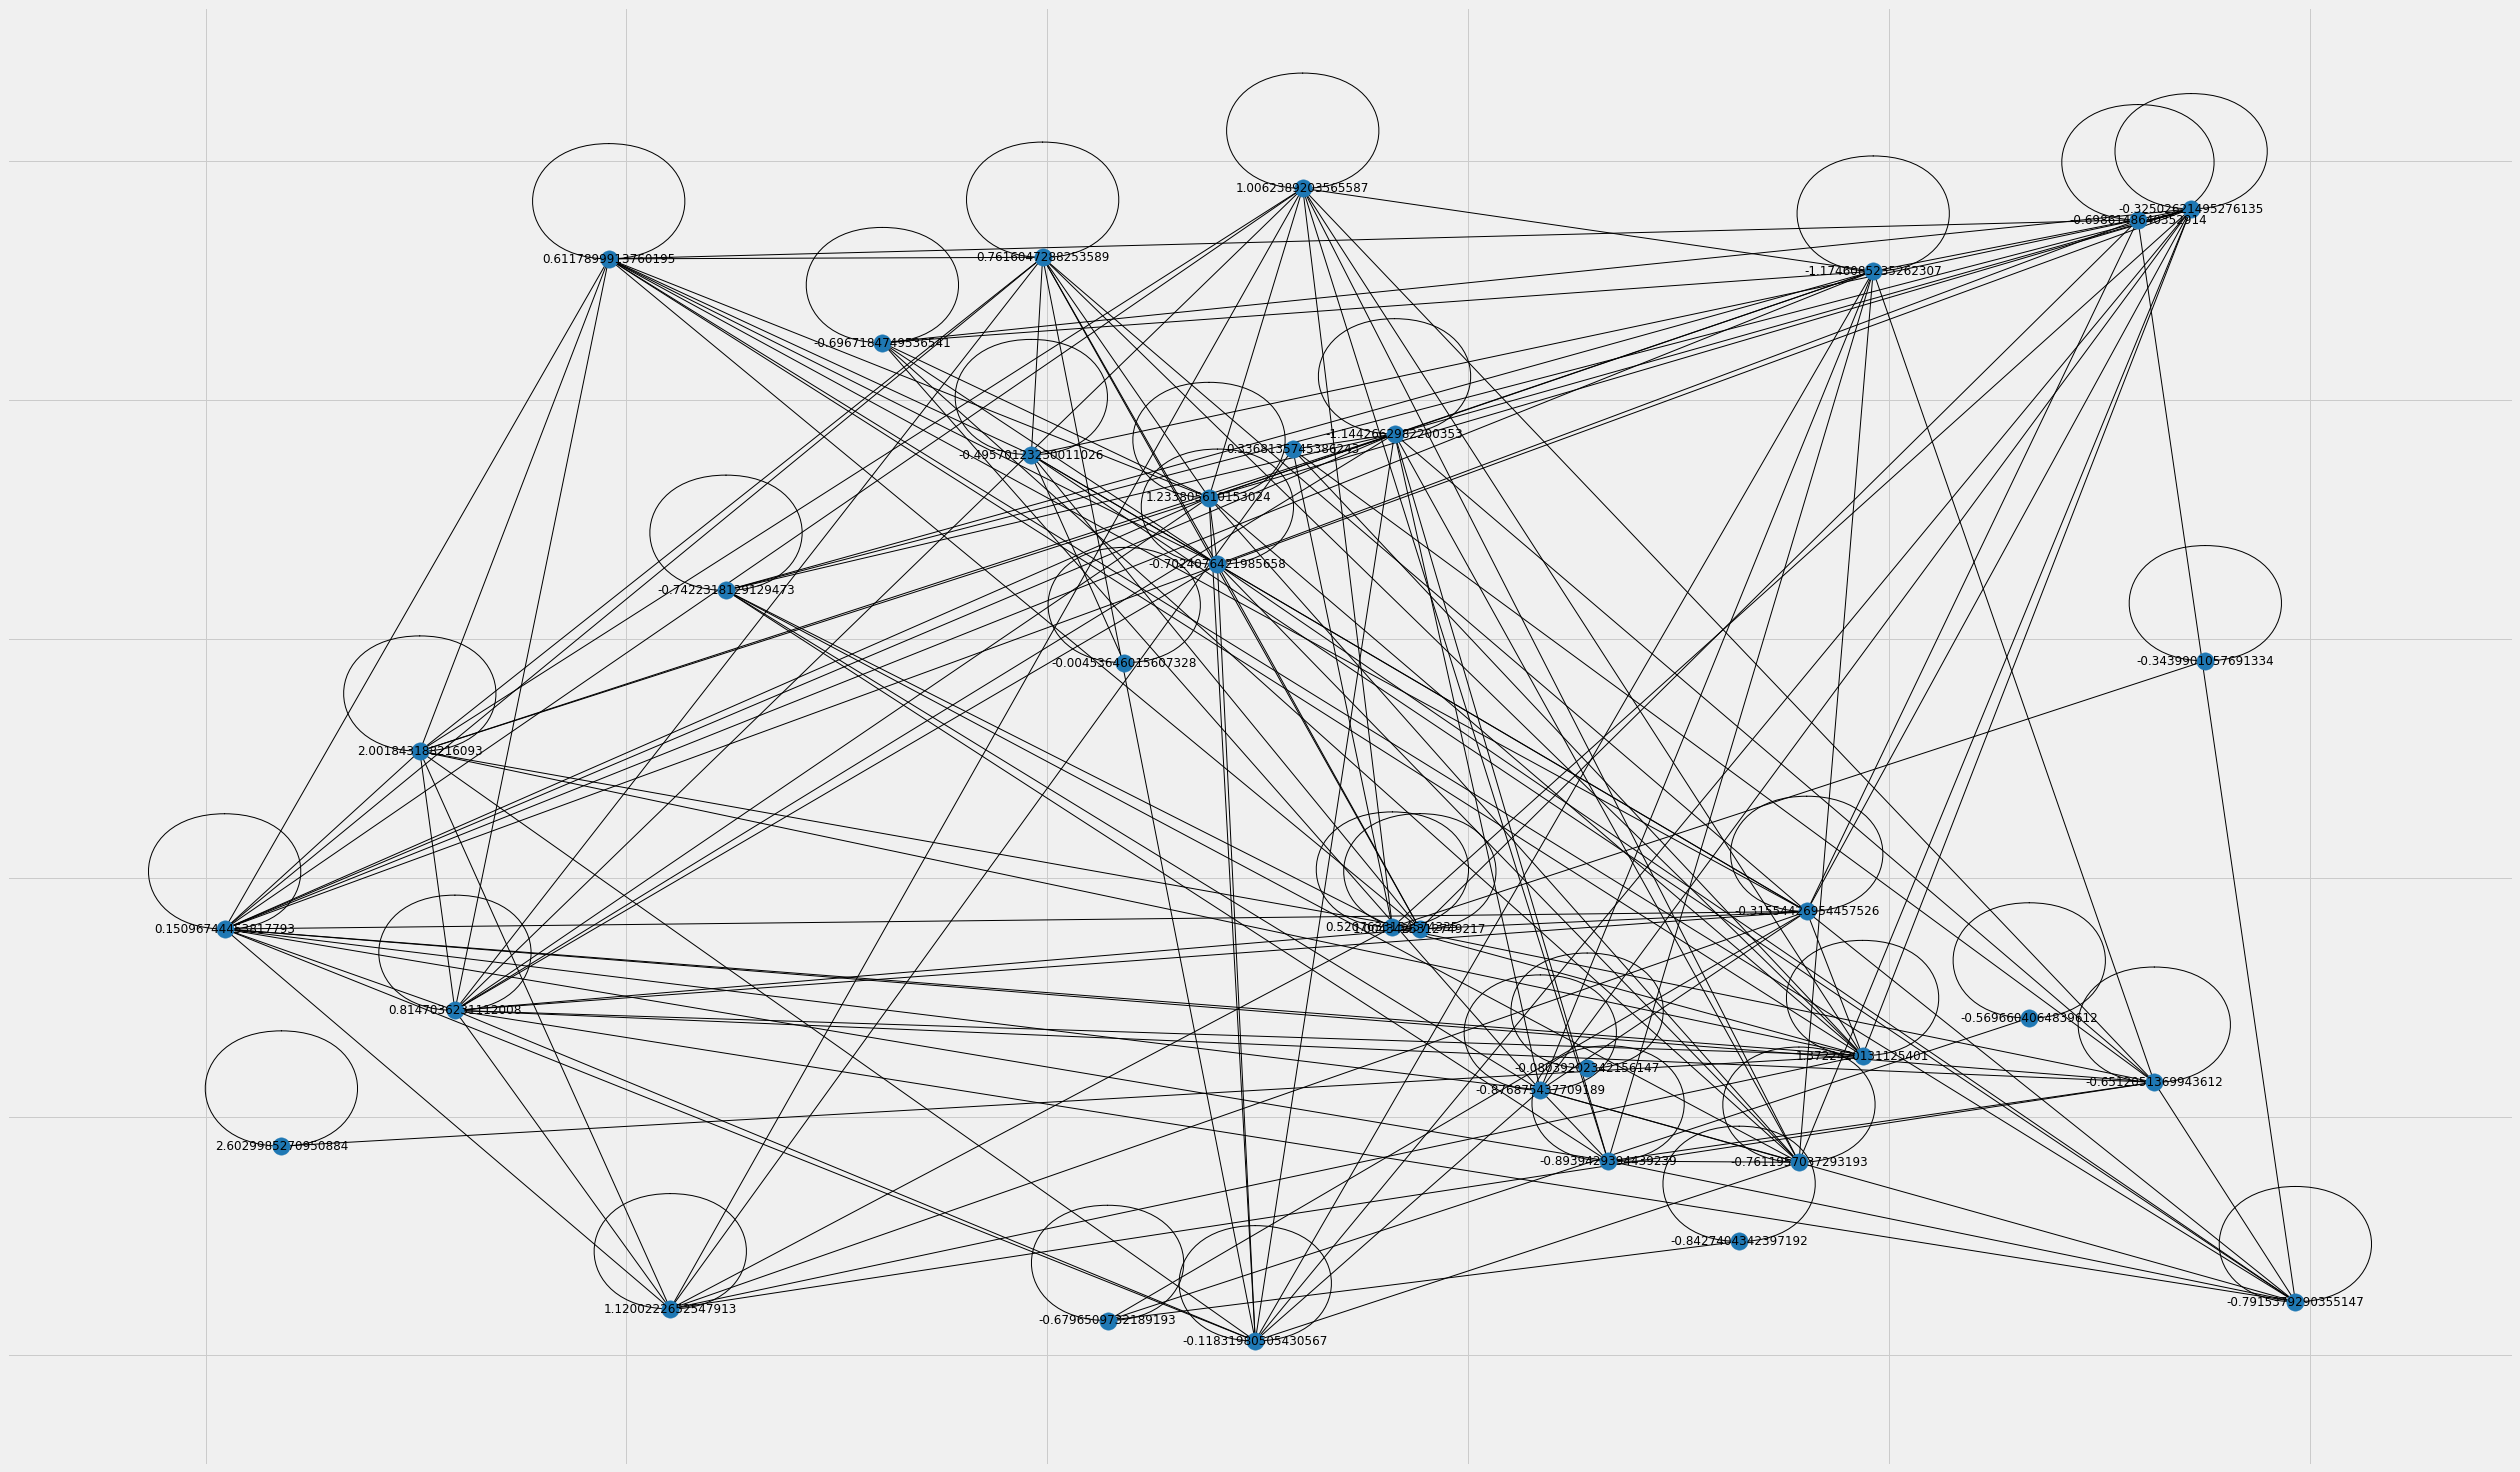

In [583]:
visualize(g)

In [584]:
len(g.edges.data())

179

In [380]:
#list(g.nodes.data())